# Question1

# Mohd Shoaib 

# 19A1HP027

In [40]:
import pandas as pd #loading files as Data frames, data manipulation and analysis.
import numpy as np

In [41]:
SA_df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data" ) # reads the dataset in dataframe

In [42]:
SA_df.head() #shows first 5 rows of dataset

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [43]:
SA_df=SA_df.drop('row.names', axis =1) #.drop() to drop column with row no.

In [44]:
SA_df.info() #gives us concise summary,shown null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [45]:
SA_df.head() #to check back first 5 rows after 1st column is dropped

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [46]:
SA_df.chd.value_counts() # returns object containing counts of 0,1,shows if they will get coronary heart disease or not

0    302
1    160
Name: chd, dtype: int64

In [47]:
X_features = list( SA_df.columns ) #listing down all columns
X_features.remove( 'chd' ) # to remove chd
X_features #printing columns

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

In [48]:
encoded_SA_df = pd.get_dummies( SA_df[X_features], drop_first = True ) #encoding categorical varialble here

In [49]:
encoded_SA_df.head() # printing encoded dataframe

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [50]:
list(encoded_SA_df.columns) #printing columns in list format

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [51]:
import statsmodels.api as sm # importing stats model for mathematical operations
Y = SA_df.chd
X = sm.add_constant( encoded_SA_df) # add constant to dependent variables

In [52]:
from sklearn.model_selection import train_test_split # importing function and then split into train test dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 46)

In [53]:
import statsmodels.api as sm #importing stats model to use logist regression
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit() #model fit

Optimization terminated successfully.
         Current function value: 0.504539
         Iterations 6


In [54]:
logit_model.summary2() #prints the summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.221     
Dependent Variable: chd              AIC:              345.9319  
Date:               2020-09-21 14:15 BIC:              383.7084  
No. Observations:   323              Log-Likelihood:   -162.97   
Df Model:           9                LL-Null:          -209.09   
Df Residuals:       313              LLR p-value:      5.7337e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const            -7.8974   1.7000 -4.6456 0.0000 -11.2293 -4.5656
sbp               0.0133   0.0072  1.8538 0.0638  -0.0008  0.0273
tobacco           0.1082   0.0328  3.2960 0.0010   0.0439  0.1726
ldl               0.1565   0.0691  2.2638 0.0236   0.0210  0.2920
adiposity         0.0107   0.0359  0.2991 0.7648  -0.0595  0.0810
typea             0.0622   0.0165  3.7765 0.0002   0.0299  0.0945
obesity          -0.0552   0.0567 -0.9737 0.3302  -0.1664  0.0559
alcohol          -0.0023   0.0056 -0.4074 0.6837  -0.0133  0.0087
age               0.0376   0.0146  2.5739 0.0101   0.0090  0.0663
famhist_Present   0.8156   0.2799  2.9143 0.0036   0.2671  1.3642
=================================================================

"""

In [78]:
# LLR p-value:	2.4811e-17 is significant
#also sbp, adiposity, obesity, alcohol are insginificant,we will remove this

In [55]:
def get_significant_vars( lm ): #accept coeffiencient of variable which have p <0.05 ,puting logit model in lm
    var_p_vals_df = pd.DataFrame( lm.pvalues ) # exctracts pvalues 
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] ) #returning p coefficient coressponding to it

In [56]:
significant_vars = get_significant_vars( logit_model ) # give us significant coeffiencients
significant_vars #print significant var

['const', 'tobacco', 'ldl', 'typea', 'age', 'famhist_Present']

In [57]:
final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars] ) ).fit() #fit model with significant vars

Optimization terminated successfully.
         Current function value: 0.511407
         Iterations 6


In [58]:
final_logit.summary2() ##printing summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.210     
Dependent Variable: chd              AIC:              342.3689  
Date:               2020-09-21 14:15 BIC:              365.0348  
No. Observations:   323              Log-Likelihood:   -165.18   
Df Model:           5                LL-Null:          -209.09   
Df Residuals:       317              LLR p-value:      1.9282e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -7.2815   1.1715 -6.2156 0.0000 -9.5776 -4.9855
tobacco            0.1060   0.0313  3.3831 0.0007  0.0446  0.1674
ldl                0.1460   0.0646  2.2615 0.0237  0.0195  0.2726
typea              0.0581   0.0160  3.6199 0.0003  0.0266  0.0895
age                0.0445   0.0122  3.6432 0.0003  0.0206  0.0684
famhist_Present    0.8205   0.2745  2.9894 0.0028  0.2825  1.3584
=================================================================

"""

In [59]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } )
#testing  model using test data set

In [60]:
y_pred_df.sample(10, random_state = 41) #print 10 rows

,actual,predicted_prob
402,1,0.512092
361,0,0.063427
139,0,0.486516
279,0,0.052860
119,0,0.174010
108,0,0.296540
48,0,0.041116
368,0,0.519326
113,1,0.382726
453,1,0.293927


In [61]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0) # giving cut off prob of 0.5 to test model
y_pred_df.sample(10, random_state = 42)  # prints 10 rows

,actual,predicted_prob,predicted
361,0,0.063427,0
108,0,0.296540,0
273,0,0.323587,0
432,0,0.025043,0
202,0,0.196899,0
310,1,0.353145,0
228,1,0.547736,1
48,0,0.041116,0
139,0,0.486516,0
434,0,0.156153,0


In [62]:
import matplotlib.pyplot as plt # importing visualisation library for plotting graphs
import seaborn as sn #importing seaborn to give us high-level interface
%matplotlib inline
from sklearn import metrics

In [63]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
        xticklabels = ["Recovered", "Not-recovered"] ,
        yticklabels = ["Recovered", "Not-recovered"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

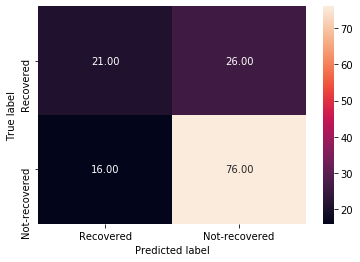

In [64]:
draw_cm( y_pred_df.actual,y_pred_df.predicted ) #plotting the graph

In [79]:
#confusion matrix

In [ ]:
# precision is 75% below we can use Youden’s index now

In [65]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.75      0.83      0.78        92
           1       0.57      0.45      0.50        47

    accuracy                           0.70       139
   macro avg       0.66      0.64      0.64       139
weighted avg       0.69      0.70      0.69       139



In [66]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

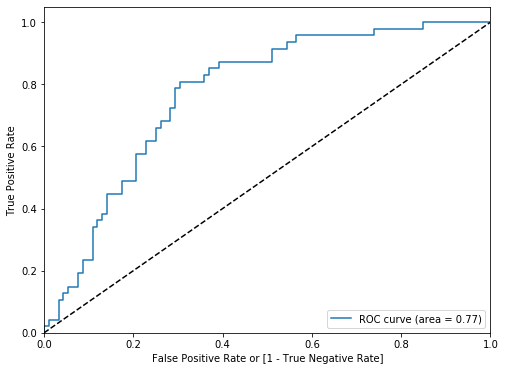

In [67]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)
# plotting ROC curve now,area under curve is 77% that is our accuracy

In [68]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( float( auc_score ), 2 ) # print area under curve

0.77

In [69]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr # to find diffrence of tpr and fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
66,0.808511,0.304348,0.324694,0.504163
64,0.787234,0.293478,0.325282,0.493756
67,0.808511,0.315217,0.323587,0.493293
65,0.787234,0.304348,0.325239,0.482886
68,0.808511,0.326087,0.318730,0.482424


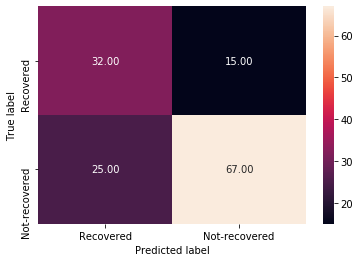

In [70]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.36 else 0)
draw_cm( y_pred_df.actual,y_pred_df.predicted_new) #plotting the graph

In [71]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        92
           1       0.56      0.68      0.62        47

    accuracy                           0.71       139
   macro avg       0.69      0.70      0.69       139
weighted avg       0.73      0.71      0.72       139



In [ ]:
# there is increase in precision to 0.82
#decrease in recall now its 0.73 
#next cost based approach

In [72]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [73]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [74]:
idx = 0
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [75]:
cost_df.sort_values( 'cost', ascending = True )[0:5]
# print the values in desc order of cost and take probabilty

,prob,cost
7,0.17,63.0
17,0.27,66.0
6,0.16,66.0
16,0.26,66.0
15,0.25,66.0


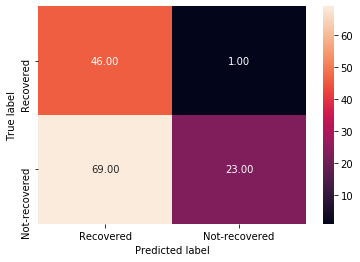

In [76]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.1 else 0) #here threshold is 0.1
draw_cm( y_pred_df.actual,y_pred_df.predicted_using_cost )

In [77]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_using_cost ))

              precision    recall  f1-score   support

           0       0.96      0.25      0.40        92
           1       0.40      0.98      0.57        47

    accuracy                           0.50       139
   macro avg       0.68      0.61      0.48       139
weighted avg       0.77      0.50      0.45       139



In [ ]:
#the accuracy has increased to 96%
#and recall has decresed to 25 %
